# **Importando bibliotecas e o dataset**

In [9]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import sklearn           as sk

In [77]:
caminho_do_arquivo = r'C:\Users\eliton.nachbar\Desktop\Projetos de Teste\Heart Disease\heart_disease_dataset.csv'


# Lê o arquivo CSV
df = pd.read_csv(caminho_do_arquivo)

In [78]:
df.columns

Index(['Age', 'Gender', 'Cholesterol', 'Blood Pressure', 'Heart Rate',
       'Smoking', 'Alcohol Intake', 'Exercise Hours', 'Family History',
       'Diabetes', 'Obesity', 'Stress Level', 'Blood Sugar',
       'Exercise Induced Angina', 'Chest Pain Type', 'Heart Disease'],
      dtype='object')

# **Análise Exploratória**

In [79]:
df.shape


(1000, 16)

In [80]:
df.describe()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,52.293000,249.939000,135.2810,79.204000,4.529000,5.646000,134.941000,0.392000
std,15.727126,57.914673,26.3883,11.486092,2.934241,2.831024,36.699624,0.488441
min,25.000000,150.000000,90.0000,60.000000,0.000000,1.000000,70.000000,0.000000
25%,39.000000,200.000000,112.7500,70.000000,2.000000,3.000000,104.000000,0.000000
50%,52.000000,248.000000,136.0000,79.000000,4.500000,6.000000,135.000000,0.000000
75%,66.000000,299.000000,159.0000,89.000000,7.000000,8.000000,167.000000,1.000000
max,79.000000,349.000000,179.0000,99.000000,9.000000,10.000000,199.000000,1.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

In [82]:
print(df.isnull().sum())

Age                          0
Gender                       0
Cholesterol                  0
Blood Pressure               0
Heart Rate                   0
Smoking                      0
Alcohol Intake             340
Exercise Hours               0
Family History               0
Diabetes                     0
Obesity                      0
Stress Level                 0
Blood Sugar                  0
Exercise Induced Angina      0
Chest Pain Type              0
Heart Disease                0
dtype: int64


In [83]:
duplicates = df.duplicated().sum()
print(f'Número de linhas duplicadas: {duplicates}')

Número de linhas duplicadas: 0


*Verificamos que na coluna 6 - Alcohol Intake temos uma quantidade faltante de dados, então vamos explorá-la melhor a seguir*


In [84]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: {unique_values}')

Unique values in Age: [75 48 53 69 62 77 64 60 37 63 67 43 44 46 45 74 76 58 31 66 79 32 41 36
 57 72 65 28 70 51 54 52 38 25 55 61 30 35 42 56 47 71 68 59 33 78 26 50
 27 39 40 29 73 49 34]
Unique values in Gender: ['Female' 'Male']
Unique values in Cholesterol: [228 204 234 192 172 309 211 208 317 282 293 325 155 226 250 279 259 246
 298 297 287 177 276 265 273 197 319 313 179 227 262 311 230 306 216 189
 162 207 271 209 251 268 286 167 348 330 264 252 232 261 257 339 166 310
 180 331 307 247 243 290 223 161 241 154 203 205 184 291 210 215 336 242
 320 284 249 248 236 174 164 296 278 196 272 328 176 327 217 222 185 201
 237 175 224 294 238 270 195 281 199 345 170 256 153 183 347 221 200 277
 302 169 329 266 198 308 283 254 343 292 181 231 275 168 187 323 156 235
 300 344 267 178 159 213 255 285 335 295 158 229 349 315 326 193 191 341
 274 214 332 212 318 280 171 337 219 322 299 244 333 186 342 260 289 173
 324 340 151 240 163 269 220 188 314 338 334 194 190 258 206 157 239 245
 233 3

In [85]:
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values for each column:")
print(missing_percentage)

Percentage of missing values for each column:
Age                         0.0
Gender                      0.0
Cholesterol                 0.0
Blood Pressure              0.0
Heart Rate                  0.0
Smoking                     0.0
Alcohol Intake             34.0
Exercise Hours              0.0
Family History              0.0
Diabetes                    0.0
Obesity                     0.0
Stress Level                0.0
Blood Sugar                 0.0
Exercise Induced Angina     0.0
Chest Pain Type             0.0
Heart Disease               0.0
dtype: float64


In [86]:
df['Alcohol Intake'].unique()

array(['Heavy', nan, 'Moderate'], dtype=object)

*Para sanar os dados faltantes da coluna Alcohol Intake, vamos preencher com "Light" ou "None", somente para dar tratamentos aos dados.*



In [87]:
df['Alcohol Intake'] = df['Alcohol Intake'].fillna('Light/None')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Cholesterol'}>,
        <Axes: title={'center': 'Blood Pressure'}>],
       [<Axes: title={'center': 'Heart Rate'}>,
        <Axes: title={'center': 'Exercise Hours'}>,
        <Axes: title={'center': 'Stress Level'}>],
       [<Axes: title={'center': 'Blood Sugar'}>,
        <Axes: title={'center': 'Heart Disease'}>, <Axes: >]],
      dtype=object)

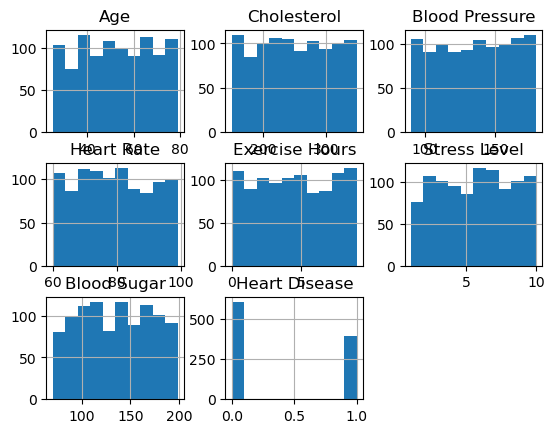

In [88]:
df.hist()

*É possível notar pelos histogramas acima uma boa distribuição em cada variável. Notamos ainda que temos um target que é a coluna Heart Disease*

In [89]:
print(df['Heart Disease'].value_counts())


Heart Disease
0    608
1    392
Name: count, dtype: int64


**Vamos plotar um gráfico para entender melhor a coluna Heart Disease e sua distribuição**

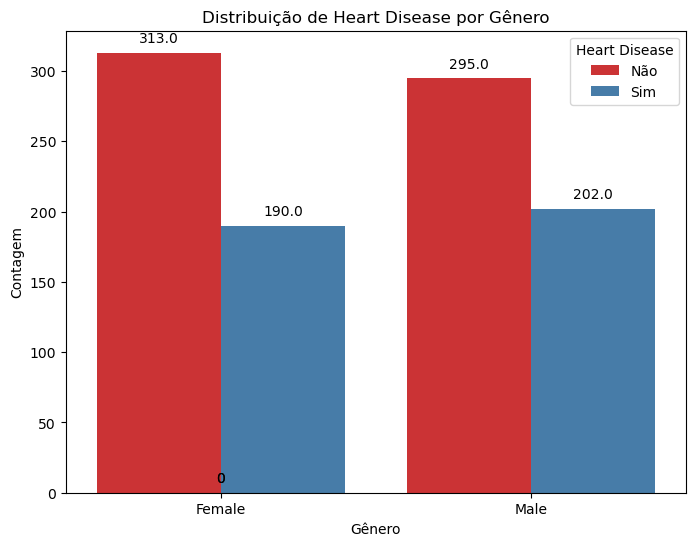

In [90]:
# Distribuição de Heart Disease por Gênero
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Heart Disease', data=df, palette='Set1')
plt.title('Distribuição de Heart Disease por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.legend(title='Heart Disease', loc='upper right', labels=['Não', 'Sim'])

# Contagem exata no topo das barras
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

<Figure size 1200x1000 with 0 Axes>

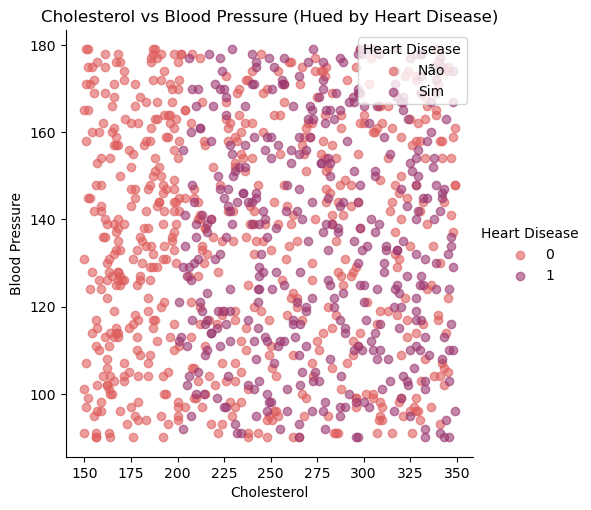

In [91]:
plt.figure(figsize=(12, 10))
sns.lmplot(x='Cholesterol', y='Blood Pressure', hue='Heart Disease', data=df, fit_reg=False, scatter_kws={'alpha':0.6}, palette='flare')
plt.title('Cholesterol vs Blood Pressure (Hued by Heart Disease)')
plt.xlabel('Cholesterol')
plt.ylabel('Blood Pressure')
plt.legend(title='Heart Disease', loc='upper right', labels=['Não', 'Sim'])

plt.show()

# **Transformando as colunas categóricas para torná-las numéricas, padronizando as variáveis contínuas.**

In [92]:
from sklearn.preprocessing import LabelEncoder

categorical_variables = ['Gender', 'Smoking', 'Alcohol Intake', 'Family History', 'Diabetes', 'Obesity', 'Exercise Induced Angina', 'Chest Pain Type']

label_encoder = LabelEncoder()

for col in categorical_variables:
    df[col] = label_encoder.fit_transform(df[col])
    category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    print(f"Mapping for {col}: {category_mapping}")


Mapping for Gender: {'Female': 0, 'Male': 1}
Mapping for Smoking: {'Current': 0, 'Former': 1, 'Never': 2}
Mapping for Alcohol Intake: {'Heavy': 0, 'Light/None': 1, 'Moderate': 2}
Mapping for Family History: {'No': 0, 'Yes': 1}
Mapping for Diabetes: {'No': 0, 'Yes': 1}
Mapping for Obesity: {'No': 0, 'Yes': 1}
Mapping for Exercise Induced Angina: {'No': 0, 'Yes': 1}
Mapping for Chest Pain Type: {'Asymptomatic': 0, 'Atypical Angina': 1, 'Non-anginal Pain': 2, 'Typical Angina': 3}


**Matriz de Correlação**

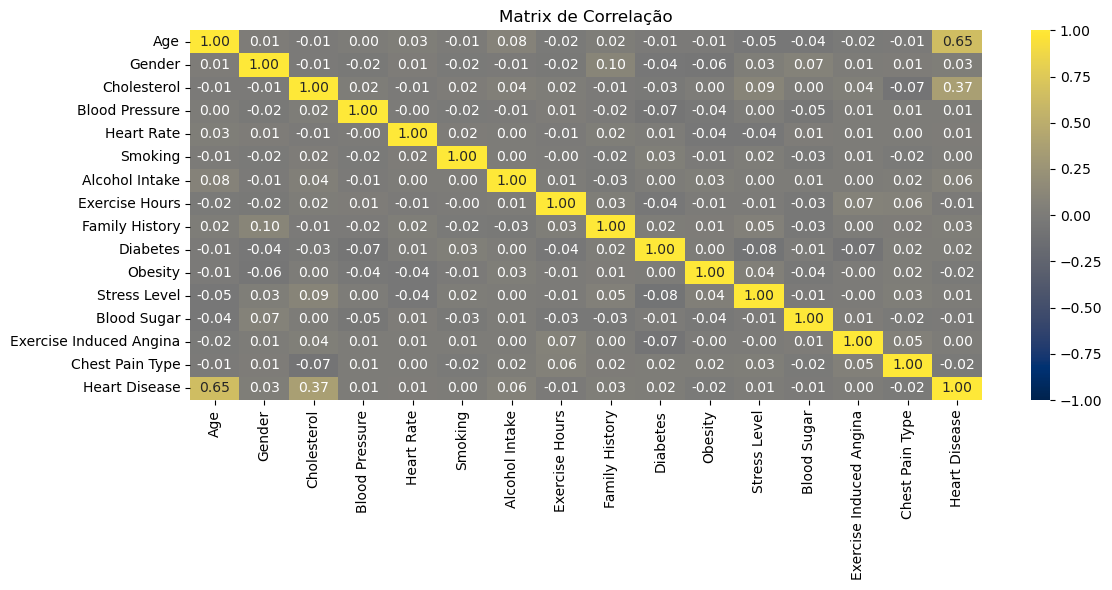

In [93]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='cividis', vmin=-1, vmax=1)
plt.title('Matrix de Correlação')
plt.tight_layout()
plt.show()


In [94]:
df1 = df.copy()

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
continuous_vars = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']


In [97]:
scaler = StandardScaler()
df[continuous_vars] = scaler.fit_transform(df[continuous_vars])

# **Importando Modelos de Machine Learning para Teste e Treino**



**Logistic Regression**

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [99]:
X = df.drop(['Heart Disease'], axis = 1)
Y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42)

In [100]:
print(X.shape, X_train.shape, X_test.shape)

(1000, 15) (800, 15) (200, 15)


In [101]:
from sklearn.linear_model import LogisticRegression

**Treino**

In [102]:
log = LogisticRegression(penalty='l2',solver='lbfgs', max_iter=1000)
log.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [103]:
y_pred = log.predict(X_train)
train_accuracy = accuracy_score(y_pred, y_train)

In [104]:
print('Accuracy Score of Training Data:', train_accuracy)

Accuracy Score of Training Data: 0.86625


**Teste**

In [105]:
y_pred_test = log.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

In [106]:
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Training Accuracy: 0.86625
Testing Accuracy: 0.86
Confusion Matrix:
 [[105  13]
 [ 15  67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       118
           1       0.84      0.82      0.83        82

    accuracy                           0.86       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.86      0.86      0.86       200



____________________________________________________________

**Random Forest**

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
random_model = RandomForestClassifier(n_estimators=100,max_depth=5,bootstrap=True,oob_score=True, random_state=42)
random_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

**Treino**

In [109]:
y_pred = random_model.predict(X_train)

In [110]:
train_accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia no conjunto de treino: {train_accuracy:.2f}')


Acurácia no conjunto de treino: 1.00


**Teste**

In [111]:
y_pred_test = random_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Acurácia no conjunto de teste: {test_accuracy:.2f}')

Acurácia no conjunto de teste: 1.00


In [112]:
conf_matrix = confusion_matrix(y_test, y_pred_test)
print('Matriz de Confusão:')
print(conf_matrix)

Matriz de Confusão:
[[118   0]
 [  0  82]]


In [113]:
class_report = classification_report(y_test, y_pred_test)
print('Relatório de Classificação:')
print(class_report)

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



____________________________________________________________

**Decision Tree Classifier**

In [114]:
from sklearn.tree import DecisionTreeClassifier

**Treino**

In [115]:
decision_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10, random_state=42)
decision_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [116]:
y_pred = decision_model.predict(X_train)

In [117]:
train_accuracy = accuracy_score(y_pred, y_train)

In [118]:
print('Accuracy Score of Training Data:', train_accuracy)

Accuracy Score of Training Data: 1.0


**Teste**

In [119]:
y_pred_test = decision_model.predict(X_test)

In [120]:
test_accuracy = accuracy_score(y_test, y_pred_test)

In [121]:
print('Accuracy Score of Test Data:', test_accuracy)

Accuracy Score of Test Data: 1.0


In [122]:
train_accuracy = accuracy_score(y_train, y_pred)
test_accuracy = accuracy_score(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
class_report = classification_report(y_test, y_pred_test)

In [123]:
print(f"Random Forest - Training Accuracy: {train_accuracy}")
print(f"Random Forest - Testing Accuracy: {test_accuracy}")
print("Random Forest - Confusion Matrix:\n", conf_matrix)
print("Random Forest - Classification Report:\n", class_report)

Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 1.0
Random Forest - Confusion Matrix:
 [[118   0]
 [  0  82]]
Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00        82

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [124]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
training_accuracies = [0.86625, 1.0, 1.0]
testing_accuracies = [0.86, 1.0, 1.0]

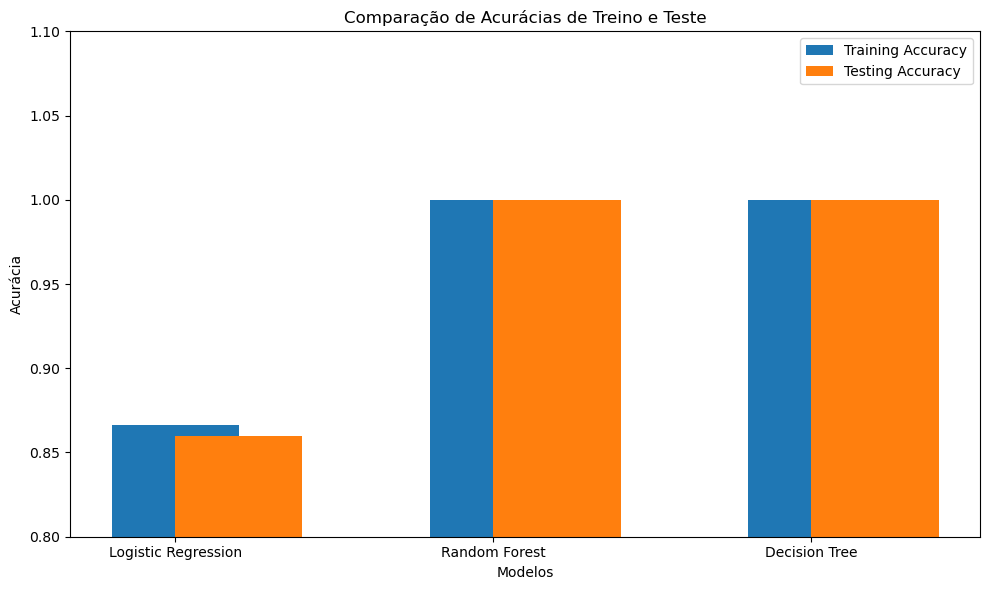

In [125]:
plt.figure(figsize=(10, 6))
plt.bar(models, training_accuracies, width=0.4, align='center', label='Training Accuracy')
plt.bar(models, testing_accuracies, width=0.4, align='edge', label='Testing Accuracy')
plt.xlabel('Modelos')
plt.ylabel('Acurácia')
plt.title('Comparação de Acurácias de Treino e Teste')
plt.ylim(0.8, 1.1)  # Adjust y-axis limits if necessary
plt.legend()
plt.tight_layout()
plt.show()


# **Interface Preditiva com Gradio**

In [126]:
from joblib import dump
import os

# Caminho onde deseja salvar os arquivos
save_path = 'C:/Users/eliton.nachbar/Desktop/Projetos de Teste/Heart Disease'

# Salvar o modelo
dump(random_model, os.path.join(save_path, 'random_model.pkl'))

# Salvar o scaler
dump(scaler, os.path.join(save_path, 'scaler.joblib'))


['C:/Users/eliton.nachbar/Desktop/Projetos de Teste/Heart Disease\\scaler.joblib']

In [127]:
df1.head(5)

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,0,228,119,66,0,0,1,0,0,1,8,119,1,1,1
1,48,1,204,165,62,0,1,5,0,0,0,9,70,1,3,0
2,53,1,234,91,67,2,0,3,1,0,1,5,196,1,1,1
3,69,0,192,90,72,0,1,4,0,1,0,7,107,1,2,0
4,62,0,172,163,93,2,1,6,0,1,0,2,183,1,0,0


In [128]:
import pandas as pd
import gradio as gr
from joblib import load
import os

# Caminho para o diretório onde os arquivos estão salvos
path = 'C:/Users/eliton.nachbar/Desktop/Projetos de Teste/Heart Disease'

# Carregar o modelo e o scaler
random_model = load(os.path.join(path, 'random_model.pkl'))
scaler = load(os.path.join(path, 'scaler.joblib'))



# Função para fazer previsões com novas entradas
def predict_heart_disease(Age, Gender, Cholesterol, BloodPressure, HeartRate, Smoking, AlcoholIntake, ExerciseHours, FamilyHistory, Diabetes, Obesity, StressLevel, BloodSugar, ExerciseInducedAngina, ChestPainType):
    # Criar um dicionário com os dados de entrada
    input_data = {
        'Age': Age,
        'Gender': Gender,
        'Cholesterol': Cholesterol,
        'Blood Pressure': BloodPressure,
        'Heart Rate': HeartRate,
        'Smoking': Smoking,
        'Alcohol Intake': AlcoholIntake,
        'Exercise Hours': ExerciseHours,
        'Family History': FamilyHistory,
        'Diabetes': Diabetes,
        'Obesity': Obesity,
        'Stress Level': StressLevel,
        'Blood Sugar': BloodSugar,
        'Exercise Induced Angina': ExerciseInducedAngina,
        'Chest Pain Type': ChestPainType
    }

    # Criar um DataFrame com os dados de entrada
    input_df = pd.DataFrame([input_data])

    # Padronizar as variáveis contínuas
    input_df[continuous_vars] = scaler.transform(input_df[continuous_vars])

    # Fazer a previsão
    prediction = random_model.predict(input_df)[0]

    # Retornar o resultado
    return "Positive for Heart Disease" if prediction == 1 else "Negative for Heart Disease"

# Configuração da interface Gradio
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"),
        gr.Number(label="Gender: 0: Female, 1: Male"),
        gr.Number(label="Cholesterol"),
        gr.Number(label="Blood Pressure"),
        gr.Number(label="Heart Rate"),
        gr.Number(label="Smoking: 0: Current, 1: Former, 2: Never"),
        gr.Number(label="Alcohol Intake: 0: Heavy, 1: Light/None, 2: Moderate"),
        gr.Number(label="Exercise Hours"),
        gr.Number(label="Family History: 0: No, 1: Yes"),
        gr.Number(label="Diabetes: 0: No, 1: Yes"),
        gr.Number(label="Obesity: 0: No, 1: Yes"),
        gr.Number(label="Stress Level"),
        gr.Number(label="Blood Sugar"),
        gr.Number(label="Exercise Induced Angina: 0: No, 1: Yes"),
        gr.Number(label="Chest Pain Type: 0: Asymptomatic, 1: Atypical Angina, 2: Non-Anginal Pain, 3: Typical Angina")
    ],
    outputs="text",
    title="Heart Disease Prediction",
    description="Please enter the following details:"
)

iface.launch(share=True, debug=True)

Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7861 <> https://98e2e833bc48b462f5.gradio.live
